In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('protocol_results (1).csv')
df

,Total Nodes,User Nodes,Barabasi interconnection rate,Average routers per node,Routers,network_recovery_rate,p.intermediary_recovery_rate,p.per_tx_amount_limit,p.lockout_after_consolidation,p.client_preventions,...,Statistics.fradulent_tx_sent_volume,Statistics.fradulent_tx_detected,Statistics.fradulent_tx_detected_volume,Statistics.fradulent_tx_client_online_check,Statistics.fradulent_tx_client_online_check_volume,Statistics.fradulent_tx_client_prevention_prevented,Statistics.fradulent_tx_client_prevention_prevented_volume,Statistics.fradulent_tx_server_lockout_prevented,Statistics.fradulent_tx_server_lockout_prevented_volume,Unnamed: 27
0,53,50,20,1.5,2,5,1,4000,False,False,...,260000,45,180000,55,220000,0,0,0,0,NaN
1,53,50,20,1.5,2,5,1,4000,True,False,...,104000,12,48000,72,288000,0,0,22,88000,NaN
2,53,50,20,1.5,2,5,1,4000,False,True,...,148000,22,88000,64,256000,20,80000,0,0,NaN
3,53,50,20,1.5,2,5,1,4000,True,True,...,132000,18,72000,54,216000,4,16000,30,120000,NaN
4,53,50,20,1.5,2,5,1,4000,False,False,...,284000,40,160000,49,196000,0,0,0,0,NaN
5,53,50,20,1.5,2,5,1,4000,True,False,...,112000,7,28000,67,268000,0,0,26,104000,NaN
6,53,50,20,1.5,2,5,1,4000,False,True,...,80000,0,0,61,244000,39,156000,0,0,NaN
7,53,50,20,1.5,2,5,1,4000,True,True,...,48000,0,0,63,252000,46,184000,0,0,NaN
8,53,50,20,1.5,2,5,5,4000,False,False,...,344000,54,216000,34,136000,0,0,0,0,NaN
9,53,50,20,1.5,2,5,5,4000,True,False,...,148000,14,56000,38,152000,0,0,46,184000,NaN


In [4]:
countermeasures = ['p.lockout_after_consolidation', 'p.client_preventions', 'p.collaberative_security']
for c in countermeasures:
    df[c] = df[c].apply(lambda x: x == ' True')

In [5]:
df['Success rate'] = df['Statistics.fradulent_tx_sent'] / df['Statistics.fradulent_tx_attempted_sent']

In [6]:
df.columns

Index(['Total Nodes', 'User Nodes', 'Barabasi interconnection rate',
       'Average routers per node', 'Routers', 'network_recovery_rate',
       'p.intermediary_recovery_rate', 'p.per_tx_amount_limit',
       'p.lockout_after_consolidation', 'p.client_preventions',
       'p.collaberative_security', 'Statistics.online_tx',
       'Statistics.online_tx_volume', 'Statistics.offline_tx',
       'Statistics.offline_tx_volume',
       'Statistics.fradulent_tx_attempted_sent',
       'Statistics.fradulent_tx_attempted_sent_volume',
       'Statistics.fradulent_tx_sent', 'Statistics.fradulent_tx_sent_volume',
       'Statistics.fradulent_tx_detected',
       'Statistics.fradulent_tx_detected_volume',
       'Statistics.fradulent_tx_client_online_check',
       'Statistics.fradulent_tx_client_online_check_volume',
       'Statistics.fradulent_tx_client_prevention_prevented',
       'Statistics.fradulent_tx_client_prevention_prevented_volume',
       'Statistics.fradulent_tx_server_lockout_pr

In [7]:
diff_off_dfs = []
off_values = [10, 20, 40, 100]
for dv in off_values:
    diff_off_dfs.append(df[df['p.intermediary_recovery_rate'] == dv])
diff_off_dfs

[    Total Nodes  User Nodes  Barabasi interconnection rate  \
 16           53          50                             20   
 17           53          50                             20   
 18           53          50                             20   
 19           53          50                             20   
 20           53          50                             20   
 21           53          50                             20   
 22           53          50                             20   
 23           53          50                             20   
 
     Average routers per node  Routers  network_recovery_rate  \
 16                       1.5        2                      5   
 17                       1.5        2                      5   
 18                       1.5        2                      5   
 19                       1.5        2                      5   
 20                       1.5        2                      5   
 21                       1.5        2   

In [8]:

to_plot = {}

In [9]:
for f in diff_off_dfs:
    dfd = f[f['p.lockout_after_consolidation'] == False]
    dfd = dfd[dfd['p.client_preventions'] == False]
    dfd = dfd[dfd['p.collaberative_security'] == False]
    to_plot['SH only ' + str(list(dfd['p.intermediary_recovery_rate'])[0])] = list(dfd['Success rate'])[0]
print(to_plot)


{'SH only 10': 0.7666666666666667, 'SH only 20': 0.975, 'SH only 40': 0.9917355371900827, 'SH only 100': 0.9421487603305785}


In [10]:
for f in diff_off_dfs:
    dfd = f[f['p.lockout_after_consolidation'] == True]
    dfd = dfd[dfd['p.client_preventions'] == False]
    dfd = dfd[dfd['p.collaberative_security'] == False]
    to_plot['Server banlist ' + str(list(dfd['p.intermediary_recovery_rate'])[0])] = list(dfd['Success rate'])[0]
print(to_plot)

{'SH only 10': 0.7666666666666667, 'SH only 20': 0.975, 'SH only 40': 0.9917355371900827, 'SH only 100': 0.9421487603305785, 'Server banlist 10': 0.3305785123966942, 'Server banlist 20': 0.6198347107438017, 'Server banlist 40': 1.0, 'Server banlist 100': 0.475}


In [11]:
for f in diff_off_dfs:
    dfd = f[f['p.lockout_after_consolidation'] == False]
    dfd = dfd[dfd['p.client_preventions'] == True]
    dfd = dfd[dfd['p.collaberative_security'] == False]
    to_plot['Log check ' + str(list(dfd['p.intermediary_recovery_rate'])[0])] = list(dfd['Success rate'])[0]
print(to_plot)

{'SH only 10': 0.7666666666666667, 'SH only 20': 0.975, 'SH only 40': 0.9917355371900827, 'SH only 100': 0.9421487603305785, 'Server banlist 10': 0.3305785123966942, 'Server banlist 20': 0.6198347107438017, 'Server banlist 40': 1.0, 'Server banlist 100': 0.475, 'Log check 10': 0.34710743801652894, 'Log check 20': 0.24786324786324787, 'Log check 40': 0.3416666666666667, 'Log check 100': 0.30973451327433627}


In [12]:
for f in diff_off_dfs:
    dfd = f[f['p.lockout_after_consolidation'] == False]
    dfd = dfd[dfd['p.client_preventions'] == True]
    dfd = dfd[dfd['p.collaberative_security'] == True]
    to_plot['Broadcast ' + str(list(dfd['p.intermediary_recovery_rate'])[0])] = list(dfd['Success rate'])[0]
print(to_plot)

{'SH only 10': 0.7666666666666667, 'SH only 20': 0.975, 'SH only 40': 0.9917355371900827, 'SH only 100': 0.9421487603305785, 'Server banlist 10': 0.3305785123966942, 'Server banlist 20': 0.6198347107438017, 'Server banlist 40': 1.0, 'Server banlist 100': 0.475, 'Log check 10': 0.34710743801652894, 'Log check 20': 0.24786324786324787, 'Log check 40': 0.3416666666666667, 'Log check 100': 0.30973451327433627, 'Broadcast 10': 0.11666666666666667, 'Broadcast 20': 0.11570247933884298, 'Broadcast 40': 0.11666666666666667, 'Broadcast 100': 0.14049586776859505}


In [13]:
measures = ['SH only ', 'Server banlist ', 'Log check ', 'Broadcast ']
rec_rates = [10, 20, 40, 100]

sub_plot = {}
for rr in rec_rates:
    row = []
    for ms in measures:
         row.append(to_plot[ms + str(rr)])
    sub_plot[str(rr)] = row
plot_df = pd.DataFrame.from_dict(sub_plot, orient='index', columns=measures)
print(plot_df)

     SH only   Server banlist   Log check   Broadcast 
10   0.766667         0.330579    0.347107    0.116667
20   0.975000         0.619835    0.247863    0.115702
40   0.991736         1.000000    0.341667    0.116667
100  0.942149         0.475000    0.309735    0.140496


In [14]:
plot_df = plot_df.reset_index()
plot_df.columns

Index(['index', 'SH only ', 'Server banlist ', 'Log check ', 'Broadcast '], dtype='object')

In [15]:
#plot_df = plot_df.drop(labels='level_0', axis=1)
plot_df

,index,SH only,Server banlist,Log check,Broadcast
0,10,0.766667,0.330579,0.347107,0.116667
1,20,0.975000,0.619835,0.247863,0.115702
2,40,0.991736,1.000000,0.341667,0.116667
3,100,0.942149,0.475000,0.309735,0.140496


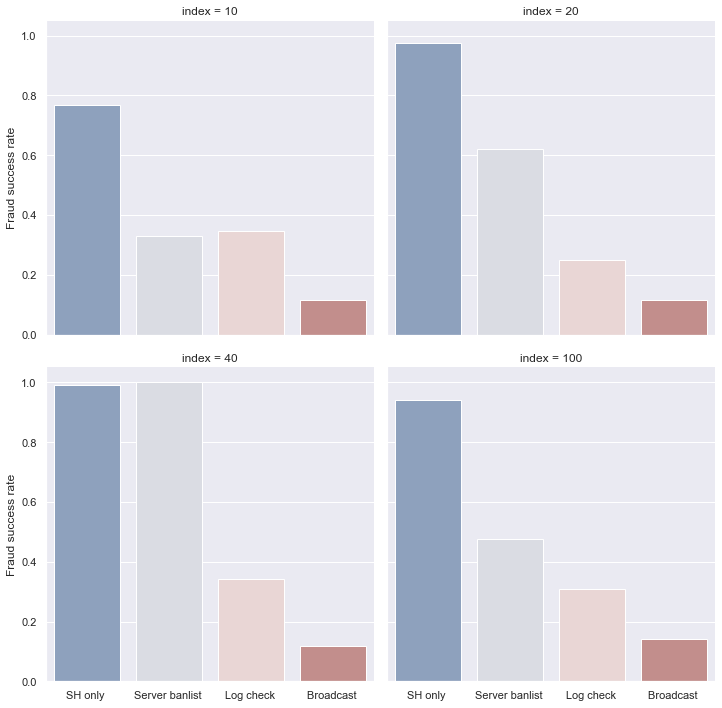

In [19]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(data=plot_df, col='index', kind='bar', palette="vlag", col_wrap=2)
ax.set_axis_labels("", "Fraud success rate")